In [7]:
##making database --but donot repeat the process and make duplicate entries

from pymongo import MongoClient
from pprint import pprint
client= MongoClient()
import pickle
# with open ('heavy_metal_parsed.pkl','r') as infile:
#          reviews=pickle.load(infile)
db=client.dsbc2

hmm=db.hmm####dsbc is database and hmm is collection
# for review in reviews:
#     hmm.save(review)####save each document into hmm collection
# cursor = hmm.find()####finds everything in the document
# pprint(cursor[0])
# type(h
# hmm.find().next()
# hmm.count()

# hmm.find().keys()
# # db = client.test_database
# # print type(db)
# # collection = db.test_collection
# # print type(collection)

In [8]:
hmm.count()
# client.dsbc.hmm.drop()
# client.dsbc.hmm.count()

856

##Challenge 1
Make a histogram of the years in the data. How many metal movies came out over the years?

In [9]:
%matplotlib inline
from pylab import *
##get all years in a list and all movie names and count them
from bson.son import SON
import matplotlib.pyplot as plt
# cursor_years = hmm.find({'year',:})

# db = MongoClient().aggregation_example
# result = db.things.insert_many([{"x": 1, "tags": ["dog", "cat"]},
#                                 {"x": 2, "tags": ["cat"]},
#                                  {"x": 2, "tags": ["mouse", "cat", "dog"]},
#                                  {"x": 3, "tags": []}])
# print result.inserted_ids

pipeline = [{"$group": {"_id": "$year", "count": {"$sum": 1}}},{"$sort": SON([("count", -1), ("_id", -1)])}]
aggregate_list=list(hmm.aggregate(pipeline))
# print aggregate_list
# print hmm.count()
aggregate_list_count=[]
aggregate_list_years=[]
for i,item in enumerate(aggregate_list):
        if item['_id'] != None:
            aggregate_list_count.append(item['_id'])
            aggregate_list_years.append(item['count'])

print aggregate_list

# print 'Number of heavy metal movies that came out over the years = %i' % hmm.count()


# print aggregate_list_count

# hist(aggregate_list_count)

[{u'count': 48, u'_id': 1982}, {u'count': 35, u'_id': 2010}, {u'count': 31, u'_id': 1986}, {u'count': 31, u'_id': 1985}, {u'count': 31, u'_id': 1981}, {u'count': 31, u'_id': 1980}, {u'count': 27, u'_id': 1983}, {u'count': 26, u'_id': 2008}, {u'count': 26, u'_id': 1987}, {u'count': 25, u'_id': 1984}, {u'count': 22, u'_id': 2009}, {u'count': 21, u'_id': 1988}, {u'count': 21, u'_id': 1973}, {u'count': 19, u'_id': 2011}, {u'count': 19, u'_id': 2007}, {u'count': 19, u'_id': 2006}, {u'count': 19, u'_id': 1977}, {u'count': 18, u'_id': 1976}, {u'count': 18, u'_id': 1974}, {u'count': 17, u'_id': 1990}, {u'count': 17, u'_id': 1978}, {u'count': 17, u'_id': 1971}, {u'count': 16, u'_id': 2001}, {u'count': 16, u'_id': 1989}, {u'count': 15, u'_id': 2012}, {u'count': 14, u'_id': 1992}, {u'count': 14, u'_id': 1975}, {u'count': 14, u'_id': 1970}, {u'count': 13, u'_id': 2005}, {u'count': 13, u'_id': 2000}, {u'count': 13, u'_id': 1979}, {u'count': 12, u'_id': 2002}, {u'count': 12, u'_id': 1991}, {u'count'

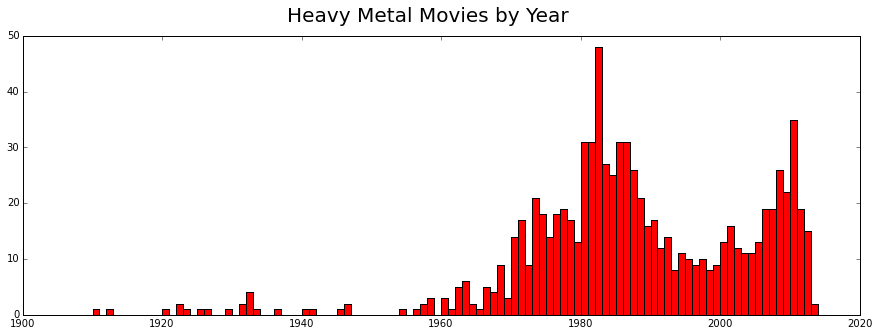

In [10]:
import numpy as np
import matplotlib.pyplot as plt
xval=aggregate_list_years
yval= aggregate_list_count
width = 1
fig, axes = plt.subplots( nrows=1, ncols=1, figsize=(15,5) )
plt.suptitle("Heavy Metal Movies by Year", fontsize=20)
axes.bar( yval, xval, width, color='r' )
plt.show()


##Challenge 2
Find the cast member that appeared in most Heavy Metal movies.Is there one that is shared by more than one of these movies? Or are they all completely different actors for every movie?


In [11]:
pipeline = [
       {"$unwind": "$cast"},
        {"$group": {"_id": "$cast", "count": {"$sum": 1}}},
        {"$sort": SON([("count", -1), ("_id", -1)])}]


print list(hmm.aggregate(pipeline)) 
###you ignore the {} one because it is blank
###answer is Alice Cooper : 15

[{u'count': 22, u'_id': u''}, {u'count': 15, u'_id': u'Alice Cooper'}, {u'count': 14, u'_id': u'Christopher Lee'}, {u'count': 10, u'_id': u'Arnold Schwarzenegger'}, {u'count': 9, u'_id': u'Ozzy Osbourne'}, {u'count': 8, u'_id': u'Vincent Price'}, {u'count': 8, u'_id': u'Peter Cushing'}, {u'count': 8, u'_id': u'Gwar'}, {u'count': 7, u'_id': u'Robert Englund'}, {u'count': 7, u'_id': u'Metallica'}, {u'count': 7, u'_id': u'Lemmy'}, {u'count': 6, u'_id': u'Robert Downey Jr.'}, {u'count': 6, u'_id': u'Linnea Quigley'}, {u'count': 6, u'_id': u'John Saxon'}, {u'count': 6, u'_id': u'Jimmy Page'}, {u'count': 6, u'_id': u'George Eastman'}, {u'count': 6, u'_id': u'David Carradine'}, {u'count': 5, u'_id': u'Tony Iommi'}, {u'count': 5, u'_id': u'Tobin Bell'}, {u'count': 5, u'_id': u'Sylvester Stallone'}, {u'count': 5, u'_id': u'Shawnee Smith'}, {u'count': 5, u'_id': u'Ronnie James Dio'}, {u'count': 5, u'_id': u'Phil Anselmo'}, {u'count': 5, u'_id': u'Nicolas Cage'}, {u'count': 5, u'_id': u'Malcolm M

'''example documnet
{u'_id': ObjectId('555f770156e9b4019926aa3e'),
 u'cast': [u'Cannibis', u'Fallen Grace', u'Funeral in Heaven', u'Merlock'],
 u'direct': [u'Naveen Marasinghe', u'Dinesh Guneratne'],
 u'head': [u'ARISE: THE SRI LANKAN METAL MUSIC DOCUMENTARY (2010)\nDIRECTORS: Naveen Marasinghe, Dinesh\nGuneratne',
           u'CAST: Cannibis, Fallen Grace, Funeral in Heaven, Merlock'],
 u'metal_cred': [u'METAL CRED',
                 u'Few of us were overly hip to the\nSri Lankan metal scene before this movie.'],
 u'raw': [u'ARISE: THE SRI LANKAN METAL MUSIC DOCUMENTARY (2010)\nDIRECTORS: Naveen Marasinghe, Dinesh\nGuneratne',
          u'CAST: Cannibis, Fallen Grace, Funeral in Heaven, Merlock',
          u'METAL CRED',
          u'Few of us were overly hip to the\nSri Lankan metal scene before this movie.',
          u'THE MEAT',
          u'Shot on the fly throughout 2008 and\n2009 by young metal fans with borrowed video cameras, Arise opens up the world of heavy metal in Sri Lanka by focusing on\nfour bands practicing four distinct forms of the music.',
          u'Cannibis drips stoner sludge.\nFallen grace plays melodic death metal. Funeral in Heaven rages black metal.\nMerlock blows minds with progressive thrash.',
          u'SOLID METAL NUGGETS',
          u'\u2022 Home recording and tape trading\nplanted heavy metal seeds all over the globe. The musicians or Arise represent that initial flowering\u2019s\never-growing bounty. Cheap cameras and the Internet have now made the\ndocumentary form the next powerful stage of metal\u2019s grassroots revolution.'],
 u'sections': [[u'ARISE: THE SRI LANKAN METAL MUSIC DOCUMENTARY (2010)\nDIRECTORS: Naveen Marasinghe, Dinesh\nGuneratne',
                u'CAST: Cannibis, Fallen Grace, Funeral in Heaven, Merlock'],
               [u'METAL CRED',
                u'Few of us were overly hip to the\nSri Lankan metal scene before this movie.'],
               [u'THE MEAT',
                u'Shot on the fly throughout 2008 and\n2009 by young metal fans with borrowed video cameras, Arise opens up the world of heavy metal in Sri Lanka by focusing on\nfour bands practicing four distinct forms of the music.',
                u'Cannibis drips stoner sludge.\nFallen grace plays melodic death metal. Funeral in Heaven rages black metal.\nMerlock blows minds with progressive thrash.'],
               [u'SOLID METAL NUGGETS',
                u'\u2022 Home recording and tape trading\nplanted heavy metal seeds all over the globe. The musicians or Arise represent that initial flowering\u2019s\never-growing bounty. Cheap cameras and the Internet have now made the\ndocumentary form the next powerful stage of metal\u2019s grassroots revolution.']],
 u'solid_metal_nuggets': [u'SOLID METAL NUGGETS',
                          u'\u2022 Home recording and tape trading\nplanted heavy metal seeds all over the globe. The musicians or Arise represent that initial flowering\u2019s\never-growing bounty. Cheap cameras and the Internet have now made the\ndocumentary form the next powerful stage of metal\u2019s grassroots revolution.'],
 u'the_meat': [u'THE MEAT',
               u'Shot on the fly throughout 2008 and\n2009 by young metal fans with borrowed video cameras, Arise opens up the world of heavy metal in Sri Lanka by focusing on\nfour bands practicing four distinct forms of the music.',
               u'Cannibis drips stoner sludge.\nFallen grace plays melodic death metal. Funeral in Heaven rages black metal.\nMerlock blows minds with progressive thrash.'],
 u'title': u'ARISE: THE SRI LANKAN METAL MUSIC DOCUMENTARY',
 u'year': 2010}'''

###Challenge 3

Find the most used words in Heavy Metal film titles.
Is there a word that appears in a lot of them? Is it "The"?
If it is something like "the", How can you get around that?
Find one "meaningful" word that appears the most (this means
non-structural word, unlike "the" or "a" or "in")# hmm.drop()

hmm.count()

In [12]:
from bson.code import Code

mapper = Code("""
            function() {  
                var summary = this.title;//title is the key
                if (summary) { 
                    // quick lowercase to normalize per your requirements
                    summary = summary.toLowerCase().split(" "); 
                    for (var i = summary.length - 1; i >= 0; i--) {
                        // might want to remove punctuation, etc. here
                        if (summary[i] && summary[i] !== "the" && summary[i]!=="of" && summary[i]!=="a"
                        && summary[i]!=="and" && summary[i]!=="in" && summary[i]!=="on")  {      // make sure there's something
                           emit(summary[i], 1); // store a 1 for each word
                        }
                    }
                }
            };               """)

reducer = Code("""
                function( key, values ) {    
                    var count = 0;    
                    values.forEach(function(v) {            
                        count +=v;    
                    });
                    return count;
                }
                                """)
result = hmm.map_reduce(mapper, reducer, {'replace': "result"})
result= result.find().sort('value', -1)
for doc in result:
    print doc
# print result.count()

###we ignore all non-structural words and the answer is metal: 29 counts

{u'_id': u'metal', u'value': 29.0}
{u'_id': u'dead', u'value': 23.0}
{u'_id': u'heavy', u'value': 18.0}
{u'_id': u'rock', u'value': 17.0}
{u'_id': u'to', u'value': 17.0}
{u'_id': u'black', u'value': 14.0}
{u'_id': u'blood', u'value': 14.0}
{u'_id': u'last', u'value': 13.0}
{u'_id': u'2', u'value': 12.0}
{u'_id': u'death', u'value': 12.0}
{u'_id': u'devil', u'value': 12.0}
{u'_id': u'night', u'value': 12.0}
{u'_id': u'hell', u'value': 10.0}
{u'_id': u'man', u'value': 10.0}
{u'_id': u'house', u'value': 9.0}
{u'_id': u'nightmare', u'value': 9.0}
{u'_id': u'evil', u'value': 8.0}
{u'_id': u'from', u'value': 8.0}
{u'_id': u'iron', u'value': 8.0}
{u'_id': u'massacre', u'value': 8.0}
{u'_id': u'&', u'value': 7.0}
{u'_id': u'at', u'value': 7.0}
{u'_id': u'horror', u'value': 7.0}
{u'_id': u'i', u'value': 7.0}
{u'_id': u'ii', u'value': 7.0}
{u'_id': u'part', u'value': 7.0}
{u'_id': u'return', u'value': 7.0}
{u'_id': u'story', u'value': 7.0}
{u'_id': u'dark', u'value': 6.0}
{u'_id': u'dawn', u'val

In [13]:
pprint(hmm.find_one()['title'])

u'ARISE: THE SRI LANKAN METAL MUSIC DOCUMENTARY'


##Challenge 4
METAL CRED section lists themes included in these movies 
that makes them more metal. What were the top 5 metal cred 
keywords in the 70s? In 80s? In 90s, In 2000s?

In [14]:
decade_ranges= [{"$gte": 1970, "$lt" : 1980}, 
                {"$gte": 1980, "$lt" : 1990},
                {"$gte": 1990, "$lt" : 2000}, 
                {"$gte" : 2000, "$lt" : 2010}] 

In [15]:
for i,item in enumerate(decade_ranges):
    pipeline = [{"$match" : {"year" : decade_ranges[i]}},
                    {"$unwind" : "$metal_cred"},
                    {"$match" : {"metal_cred" : {"$ne" : "METAL CRED"}}},
                    {"$match" : {"metal_cred" : {"$ne" : "METAL\nCRED"}}},
                    {"$group" : {"_id" : "$metal_cred", "count" : {"$sum" : 1}}},
                    {"$sort" : {"count" : -1}},
                    {"$limit" : 5}]
    results  = hmm.aggregate(pipeline)
    print item
    print "     "
    print list(results)
    print "     "

{'$gte': 1970, '$lt': 1980}
     
[{u'count': 19, u'_id': u'Satan'}, {u'count': 10, u'_id': u'Black Mass'}, {u'count': 7, u'_id': u'Post-Apocalypse'}, {u'count': 7, u'_id': u'Video Nasty'}, {u'count': 6, u'_id': u'Zombies'}]
     
{'$gte': 1980, '$lt': 1990}
     
[{u'count': 29, u'_id': u'Post-Apocalypse'}, {u'count': 20, u'_id': u'Sword and Sorcery'}, {u'count': 16, u'_id': u'Satan'}, {u'count': 12, u'_id': u'Video Nasty'}, {u'count': 11, u'_id': u'\u201980s Slasher'}]
     
{'$gte': 1990, '$lt': 2000}
     
[{u'count': 7, u'_id': u'Satan'}, {u'count': 6, u'_id': u'Gwar'}, {u'count': 4, u'_id': u'Post-Apocalypse'}, {u'count': 4, u'_id': u'Lemmy'}, {u'count': 3, u'_id': u'Metallica'}]
     
{'$gte': 2000, '$lt': 2010}
     
[{u'count': 11, u'_id': u'Torture Porn'}, {u'count': 7, u'_id': u'Satan'}, {u'count': 4, u'_id': u'Music Score: Charlie Clouser'}, {u'count': 4, u'_id': u'Christopher Lee'}, {u'count': 4, u'_id': u'Jigsaw'}]
     


##Challenge 5
Let's use the length of the METAL CRED section as a proxy score for how metal a movie is. Let's call this the METAL SCORE. To each mongo document, add the metal_score as a new field.

In [16]:
cursor = hmm.find()####finds everything in the document
pprint(cursor[2])
for item in cursor:
    score=len(item['metal_cred'])
    hmm.update({"_id":item["_id"]},{"$set":{"metal_score":score}})
     
item.keys()
#     hmm.update({"_id": record["_id"]}, {"$set": {"metal_score": metal_score}})

{u'_id': ObjectId('55614c1456e9b4016084a5b9'),
 u'cast': [u'Gerard Butler', u'Lena Headey', u'Kelly Craig', u'Dominic West'],
 u'direct': [u'Zack Snyder'],
 u'head': [u'300 (2006)\nDIRECTOR: Zack Snyder\nCAST: Gerard Butler, Lena Headey,\nKelly Craig, Dominic West'],
 u'metal_cred': [u'METAL CRED',
                 u'Sword and Sorcery',
                 u'Battle Elephants vs. Battle Rhinos',
                 u'Pit of Death',
                 u'Sparta band\u2014UK',
                 u'Spartan Warrior\u2014UK',
                 u'Leonidas band\u2014Argentina',
                 u'Xerxes band\u2014Switzerland'],
 u'metal_score': 8,
 u'raw': [u'300 (2006)\nDIRECTOR: Zack Snyder\nCAST: Gerard Butler, Lena Headey,\nKelly Craig, Dominic West',
          u'METAL CRED',
          u'Sword and Sorcery',
          u'Battle Elephants vs. Battle Rhinos',
          u'Pit of Death',
          u'Sparta band\u2014UK',
          u'Spartan Warrior\u2014UK',
          u'Leonidas band\u2014Argentina',
      

[u'head',
 u'metal_cred',
 u'title',
 u'metal_score',
 u'direct',
 u'solid_metal_nuggets',
 u'cast',
 u'raw',
 u'the_meat',
 u'year',
 u'_id',
 u'sections']

In [17]:
# cursor = hmm.find()
# for record in cursor:
#     metal_score = len(record['metal_cred'])
#     hmm.update({"_id": record["_id"]}, {"$set": {"metal_score": metal_score}})
    
#     metal_score=len(list(item['metal_cred']))
#     hmm.update({'_id':item["_id"]}, {"$set": {"METAL_SCORE",metal_score}})

In [18]:
# cursor = hmm.find().limit(3)####finds everything in the document
# pprint(cursor[0])

##Challenge 6
Find the director that is MOST METAL per movie (director with 
the highest average metal score). Remember that some movies have 
multiple directors.

In [24]:
pipeline = [
            {"$unwind" : "$direct"},
            {"$group" : {"_id" : "$direct", "metalindex" : {"$avg" : "$metal_score"}}},
            {"$sort" : {"metalindex" : -1}},
            {"$limit" : 1}]
results  = hmm.aggregate(pipeline)

for item in results:
    print "Top average metal score and corresponding director are:"
    print 
    print item
    

Top average metal score and corresponding director are:

{u'metalindex': 75.0, u'_id': u'John Milius'}


##Challenge 7
The majority of directors and actors will have worked on 
a single movie. See if there are any directors that worked 
with an actor more than once. If so, find the director-actor 
duo that have worked together the most times.

In [29]:
pipeline = [
            {"$unwind" : "$direct"},
            {"$unwind" : "$cast"},
            {"$group" : {"_id" : {"direct" : "$direct", "cast" : "$cast"}, "count" : {"$sum" : 1}}}, 
            {"$sort" : {"count" : -1}},
            {"$limit" : 10}]
results  = hmm.aggregate(pipeline)

for item in results:
    print "The actor and director who work together most often are:"
    print 
    print item

The actor and director who work together most often are:

{u'count': 4, u'_id': {u'cast': u'Christopher Lee', u'direct': u'Peter Jackson'}}
The actor and director who work together most often are:

{u'count': 4, u'_id': {u'cast': u'George Eastman', u'direct': u'Joe D\u2019Amato'}}
The actor and director who work together most often are:

{u'count': 4, u'_id': {u'cast': u'Daria Nicolodi', u'direct': u'Dario Argento'}}
The actor and director who work together most often are:

{u'count': 4, u'_id': {u'cast': u'Sheri Moon Zombie', u'direct': u'Rob Zombie'}}
The actor and director who work together most often are:

{u'count': 3, u'_id': {u'cast': u'Jason Baldwin', u'direct': u'Joe Berlinger'}}
The actor and director who work together most often are:

{u'count': 3, u'_id': {u'cast': u'Jessie Misskelley', u'direct': u'Joe Berlinger'}}
The actor and director who work together most often are:

{u'count': 3, u'_id': {u'cast': u'Tobin Bell', u'direct': u'Darren Lynn Bousman'}}
The actor and direc

##Challenge 8

Create an index on the 'director' field to make the queries 
involving it faster. What is an index?

In [41]:
hmm.drop_indexes()
hmm.create_index("direct")
for index in hmm.list_indexes():
    print index
index_definition="Similar to a book's index, a Mongodb index provides shortcuts for Mongo to answer queries about the indexed field.    However, indexes will slow down operations that update the database if the update requires rebuilding the index"   
print 
print index_definition

SON([(u'v', 1), (u'key', SON([(u'_id', 1)])), (u'name', u'_id_'), (u'ns', u'dsbc2.hmm')])
SON([(u'v', 1), (u'key', SON([(u'direct', 1)])), (u'name', u'direct_1'), (u'ns', u'dsbc2.hmm')])

Similar to a book's index, a Mongodb index provides shortcuts for Mongo to answer queries about the indexed field.    However, indexes will slow down operations that update the database if the update requires rebuilding the index
